In [2]:
import pandas as pd
import numpy as np
import os
from statsmodels.robust import mad

# Hierarchical clustering
import scipy.cluster.hierarchy as sch
#Wavelet
import pywt
# LOF
import sklearn.neighbors as sn
# Isolation Forest
import sklearn.ensemble as se

# Plot et Display
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style("darkgrid", {"axes.facecolor": ".9"})

/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Lecture des données

In [3]:
path="../Donnees_projet/Ensemble_apprentissage/"
#path="../Donnees_projet/Ensemble_test/"
files = os.listdir(path)

# Décomposition en ondelettes

In [6]:
import pywt
from pywt import wavedec
from statsmodels.robust import mad

In [97]:
wf = "haar"

Coeff = []
TCoeff = []

for i in range(300):
    data = pd.read_csv(path + files[i])
    x=data["FF_1"]
    #Apply wavelet decomposition
    coeffs = pywt.wavedec(x,wf,level=7)  #Niveau 7
    coeffs_flatten = np.hstack(coeffs)
    Coeff.append(coeffs_flatten)
    # Compute universal Threshold http://jseabold.net/blog/2012/02/23/wavelet-regression-in-python/
    sigma = mad(coeffs[-1])
    uthresh = sigma*np.sqrt(2*np.log(np.shape(x)))
    # Apply Threshold on 4 first levels
    coeffs_thresh = [pywt.threshold(c, uthresh, mode="hard") if i<=3 else c for i,c in enumerate(coeffs[::-1])]
    coeffs_thresh_flatten = np.hstack(coeffs_thresh[::-1])
    TCoeff.append(coeffs_thresh_flatten)
    
Coeff = np.array(Coeff)
TCoeff = np.array(TCoeff)
print(Coeff.shape, TCoeff.shape)
print(np.sum(Coeff!=0), np.sum(TCoeff!=0))

(300,) (300,)
1 1


/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


## ACP des coefficients d'ondelettes

In [98]:
long_max=min([len(x) for x in Coeff])

In [99]:
seuil=[]
for i in range(np.shape(Coeff)[0]):
    c = Coeff[i].tolist()
    c =[x for x in c if x >= np.sort(c)[-long_max]][:long_max]
    seuil.append(c)
    
seuil=np.asarray(seuil)

In [100]:
acp = sd.PCA()
X_acp = acp.fit_transform(sp.scale(seuil))

Text(0.5,1,'Distribution des premieres composantes')

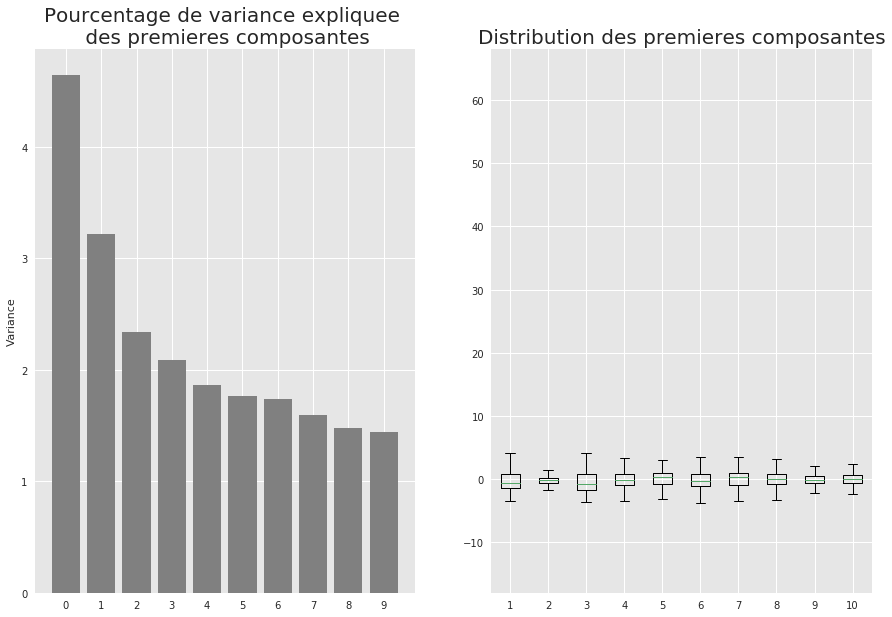

In [101]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.bar(range(10), acp.explained_variance_ratio_[:10]*100, align='center', color='grey', ecolor='black')
ax.set_xticks(range(10))
ax.set_ylabel("Variance")
ax.set_title("Pourcentage de variance expliquee \n des premieres composantes", fontsize=20)

ax = fig.add_subplot(1,2,2)
box=ax.boxplot(X_acp[:,0:10])
ax.set_title("Distribution des premieres composantes", fontsize=20)


No handles with labels found to put in legend.


Text(0.5,1,'Projection des features sur les \n  deux premieres composantes')

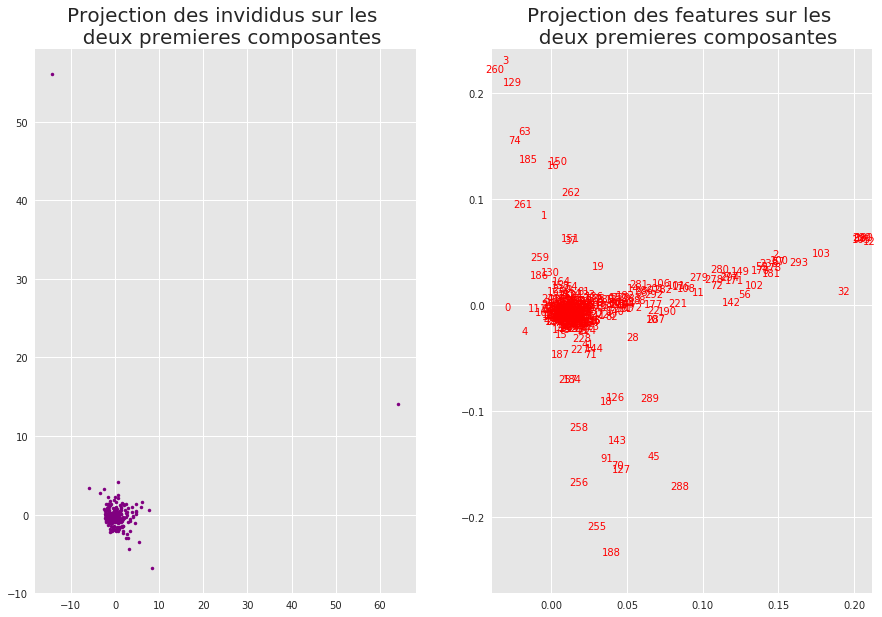

In [103]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
for x,y,s in zip(X_acp[:,0], X_acp[:,1], map(str,range(300))):
    ax.plot(x,y,marker=".",color='purple')
plt.legend(fontsize=15)
ax.set_title("Projection des invididus sur les \n  deux premieres composantes", fontsize=20)


ax = fig.add_subplot(1,2,2)
for x,y,s in zip(acp.components_[0], acp.components_[1], map(str,range(300))):
    ax.text(x,y,s, horizontalalignment="center", verticalalignment="center", color="red")
ax.set_xlim(acp.components_[0].min()-0.002,acp.components_[0].max()+0.002)
ax.set_ylim(acp.components_[1].min()-0.01,acp.components_[1].max()+0.01)
ax.set_title("Projection des features sur les \n  deux premieres composantes", fontsize=20)
